Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipelineForNegativePrompts and will be ignored.
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


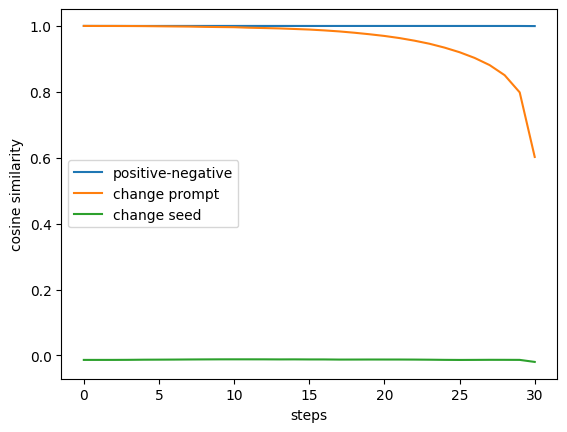

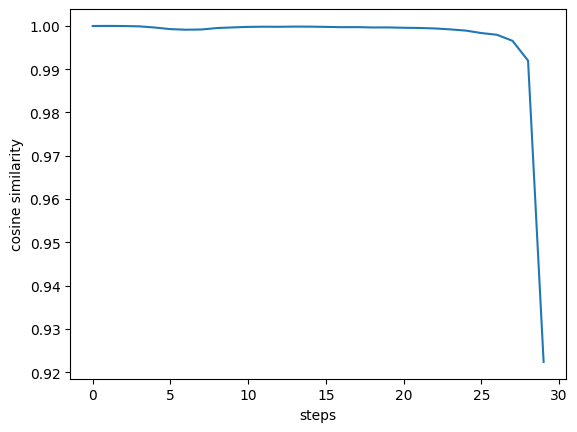

In [42]:
# test the aligning hypothesis

import argparse
from daam import set_seed, trace
from models.diffuserpipeline import StableDiffusionPipelineForNegativePrompts
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

import torch.nn.functional as F

prompt_sec = "train station, watercolor painting" 
negative_prompt_sec = "train"


model_id = 'stabilityai/stable-diffusion-2-base'
device = 'cuda'
pipe = StableDiffusionPipelineForNegativePrompts.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

steps = 30

seed_1 = 6463344
seed_2 = 7056021

prompt_1 = "A couple walking along the riverbank in Paris, with the Eiffel Tower not far away"
negative_prompt_1 = "Eiffel Tower"
prompt_2 =  "A neatly arranged dining table with a vase filled with sunflowers on it"
negative_prompt_2 = "plate, fork"

with torch.cuda.amp.autocast(dtype=torch.float16), torch.no_grad():
        
    _, _, negative_noises_1_1, positive_noises_1_1, uncond_noises_1_1 = pipe.negative_accumulate(prompt_1, negative_prompt=negative_prompt_1, num_inference_steps=steps, generator=set_seed(seed_1))
    
    _, _, negative_noises_2_1, positive_noises_2_1, uncond_noises_2_1 = pipe.negative_accumulate(prompt_2, negative_prompt=negative_prompt_2, num_inference_steps=steps, generator=set_seed(seed_1))

    _, _, negative_noises_1_2, positive_noises_1_2, uncond_noises_1_2 = pipe.negative_accumulate(prompt_1, negative_prompt=negative_prompt_1, num_inference_steps=steps, generator=set_seed(seed_2))


    # fig = plt.figure(figsize=(10, 10))
    cos_sims = []
    for i in range(steps+1):
        positive_noise = negative_noises_1_1[i] # * negative_maps[i]
        
        negative_noise = positive_noises_1_1[i] # * negative_maps[i]
        
        # compute cos similarity
        positive_noise = positive_noise.view(4 * 64 * 64)
        negative_noise = negative_noise.view(4 * 64 * 64)
        cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
        cos_sims.append(cos_sim.item())
        # plot cos_sim and save image
    plt.plot(cos_sims)
    #plt.show()
    cos_sims = []
    for i in range(steps+1):
        positive_noise = negative_noises_1_1[i] # * negative_maps[i]
        
        negative_noise = negative_noises_2_1[i] # * negative_maps[i]
        
        # compute cos similarity
        positive_noise = positive_noise.view(4 * 64 * 64)
        negative_noise = negative_noise.view(4 * 64 * 64)
        cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
        cos_sims.append(cos_sim.item())
        # plot cos_sim and save image
    plt.plot(cos_sims)
    #plt.show()
    cos_sims = []
    for i in range(steps+1):
        positive_noise = negative_noises_1_1[i] # * negative_maps[i]
        
        negative_noise = negative_noises_1_2[i] # * negative_maps[i]
        
        # compute cos similarity
        positive_noise = positive_noise.view(4 * 64 * 64)
        negative_noise = negative_noise.view(4 * 64 * 64)
        cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
        cos_sims.append(cos_sim.item())
        # plot cos_sim and save image
    plt.plot(cos_sims)
    plt.xlabel('steps')
    plt.ylabel('cosine similarity')
    plt.legend(['positive-negative', 'change prompt', 'change seed'], loc='center left')
    # plt.show()
    plt.savefig('how/align.png')
    plt.show()   
    # plt.xlabel('steps')
    # plt.ylabel('cosine similarity')


    cos_sims = []
    for i in range(steps):
        positive_noise = positive_noises_1_1[i] # * negative_maps[i]
        negative_noise = positive_noises_1_1[i+1] # * negative_maps[i]
        
        # compute cos similarity
        positive_noise = positive_noise.view(4 * 64 * 64)
        negative_noise = negative_noise.view(4 * 64 * 64)
        cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
        cos_sims.append(cos_sim.item())
    plt.plot(cos_sims)
    plt.xlabel('steps')
    plt.ylabel('cosine similarity')
    
    plt.savefig('how/align_time.png')
    plt.show()

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipelineForNegativePrompts and will be ignored.
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 13.74it/s]


Text(0, 0.5, 'cosine similarity')

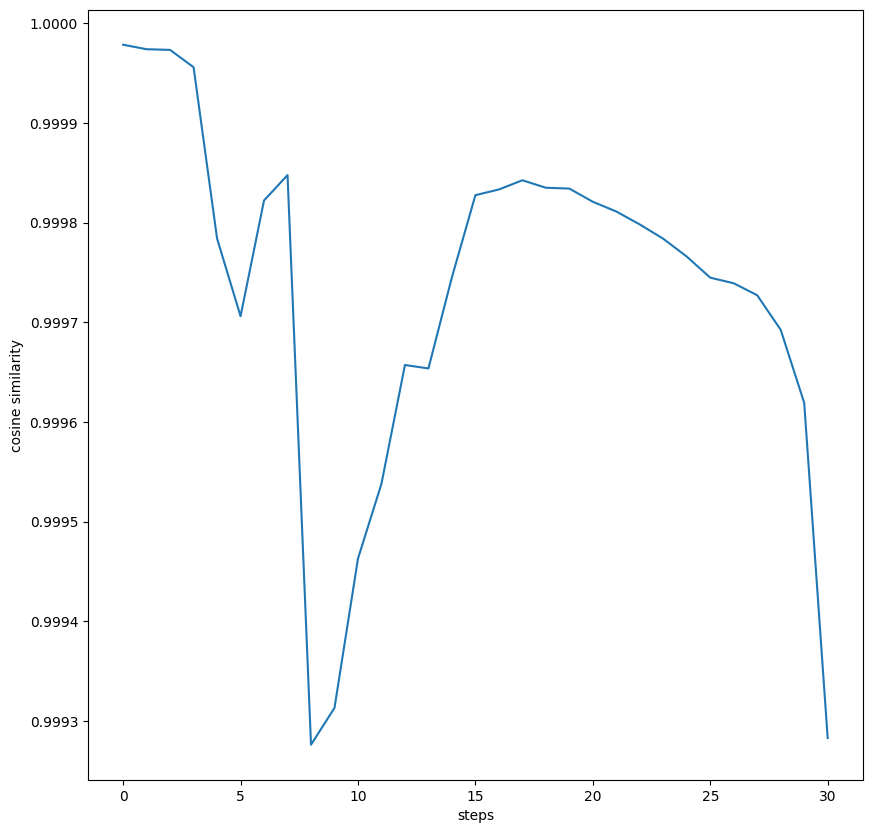

In [30]:
# test the aligning hypothesis

import argparse
from daam import set_seed, trace
from models.diffuserpipeline import StableDiffusionPipelineForNegativePrompts
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

prompt_sec = "train station, watercolor painting" 
negative_prompt_sec = "train"

model_id = 'stabilityai/stable-diffusion-2-base'
device = 'cuda'
pipe = StableDiffusionPipelineForNegativePrompts.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

steps = 30

seed_1 = 6463344
seed_2 = 7056021

prompt_1 = "A couple walking along the riverbank in Paris, with the Eiffel Tower not far away"
negative_prompt_1 = "Eiffel Tower"
prompt_2 =  "A neatly arranged dining table with a vase filled with sunflowers on it"
negative_prompt_2 = "plate, fork"

with torch.cuda.amp.autocast(dtype=torch.float16), torch.no_grad():
        
    _, _, negative_noises_1_1, positive_noises_1_1, uncond_noises_1_1 = pipe.negative_accumulate(prompt_1, negative_prompt=negative_prompt_1, num_inference_steps=steps, generator=set_seed(seed_1))
    
    _, _, negative_noises_2_1, positive_noises_2_1, uncond_noises_2_1 = pipe.negative_accumulate(prompt_2, negative_prompt=negative_prompt_2, num_inference_steps=steps, generator=set_seed(seed_1))

    _, _, negative_noises_1_2, positive_noises_1_2, uncond_noises_1_2 = pipe.negative_accumulate(prompt_1, negative_prompt=negative_prompt_1, num_inference_steps=steps, generator=set_seed(seed_2))

    
    cos_sims = []

    for i in range(steps+1):
        positive_noise = negative_noises_1_1[i] # * negative_maps[i]
        
        negative_noise = uncond_noises_1_1[i] # * negative_maps[i]
        
        # compute cos similarity
        positive_noise = positive_noise.view(4 * 64 * 64)
        negative_noise = negative_noise.view(4 * 64 * 64)
        cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
        cos_sims.append(cos_sim.item())
    
    # for i in range(steps):
    #     positive_noise = torch.sign(positive_noises_1_1[i]) # * negative_maps[i]
        
    #     negative_noise = torch.sign(positive_noises_1_1[i+1]) # * negative_maps[i]
        
    #     # compute cos similarity
    #     positive_noise = positive_noise.view(4 * 64 * 64)
    #     print(positive_noise)
    #     negative_noise = negative_noise.view(4 * 64 * 64)
    #     cos_sim = F.cosine_similarity(positive_noise, negative_noise, dim=0)
    #     cos_sims.append(cos_sim.item())
        
# plot cos_sim and save image
fig = plt.figure(figsize=(10, 10))
plt.plot(cos_sims)
plt.xlabel('steps')
plt.ylabel('cosine similarity')